In [4]:
#匯入奶茶資料
import pandas as pd

excel_path = r"milkteadata.xlsx"#加 r 防止轉義符號

data = pd.read_excel(excel_path)

In [5]:
title_list =  list(data["標題"])#pandas 取一整欄用法

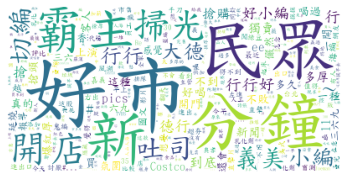

<Figure size 50000x50000 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud
title_str = " ".join(title_list)#為了放入詞雲，必須把串列換成字串形式

title_str.replace("\n","").replace("\r","").replace("、","").replace("▼","").replace("►","").replace("▲","").replace("※","").replace("\xa0","").replace("？","").replace("【","").replace("】","").replace("●","").replace("★","").replace("【","").replace("】","")
#做一些符號的替換
jieba.load_userdict("dict.txt.big")#匯入big5字典，避免亂碼
Sentence = jieba.cut(title_str, cut_all=False)#cut_all=True 全模式 =False 精確模式 jieba.cut_for_search 搜尋引擎模式


stopword=[] #建立停用詞字典字串等等要匯入
with open("stopword.txt","r",encoding="UTF-8") as file:
    for data in file.readlines():
        data=data.strip() #移除字串頭尾的空白
        stopword.append(data)
stoplst=[" ","\xa0","#","...","\u3000","★",'The',"How","Why",'也', '日', '月', '人', '在', '是', '的', '4', '5', '，', '、', ',', '!', '2', '3','2021', '12', '2', '「', '」', '(', ')', '！', '（', '）', '。', '/', '／', '?',"\n","?","1","]","[","]","Web","Core","09","【","】","#","http","~","厚","奶茶"]
#這邊可以新增停用詞 *把厚奶茶替換掉是為厚奶茶是本篇主題
for i in stoplst:
    stopword.append(i)
'''
stopword = {}.fromkeys(stopwords)#快速建立字典的方法，目前值都為0 #為什麼要建成字典
'''
Sentence = jieba.cut_for_search(title_str)
hash = {}

for item in Sentence:
    if item in stopword:
        continue
    if item in hash:
        hash[item] +=1
    else:
        hash[item] = 1

wc = WordCloud(font_path="TW-Kai-98_1.ttf",background_color="white",max_words=2000,stopwords=stopword)

wc.generate_from_frequencies(hash)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(50,50),dpi=1000)
plt.show
wc.to_file("output.png")